/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB
Epoch 1/30
516/516 - 0s - loss: 0.3432 - val_loss: 0.2882
Epoch 2/30
516/516 - 0s - loss: 0.2742 - val_loss: 0.2630
Epoch 3/30
516/516 - 0s - loss: 0.2581 - val_loss: 0.2521
Epoch 4/30
516/516 - 0s - loss: 0.2495 - val_loss: 0.2470
Epoch 5/30
516/516 - 0s - loss: 0.2423 - val_loss: 0.2507
Epoch 6/30
51

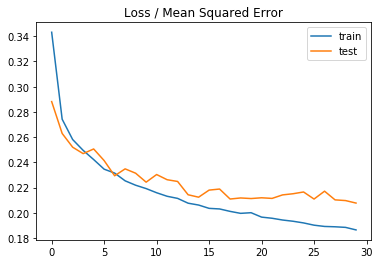

Root Mean Squared Error is 0.45581097290663436


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: color argument of Icon should be one of: {'lightred', 'lightgreen', 'darkblue', 'cadetblue', 'darkgreen', 'pink', 'blue', 'lightgray', 'red', 'purple', 'beige', 'white', 'orange', 'lightblue', 'green', 'darkpurple', 'darkred', 'gray', 'black'}.


None


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
from sklearn import metrics,preprocessing
import folium
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as pyplot
import os

df = pd.read_csv("/Users/taraapple/Desktop/housing.csv")
df.head()
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df['ocean_proximity']=number.fit_transform(df['ocean_proximity'].astype('str'))
data = df.columns
predictors = df[data[data != 'median_house_value']]
target = df['median_house_value']
predictors.fillna(predictors.mean(), inplace=True)
predictors.info()
predictors.describe()

from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.20)

x_norm = (predictors-predictors.mean())/predictors.std()
y_norm = (target-target.mean())/target.std()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y_norm,test_size=0.20,random_state=0)
n_cols = x_train.shape[1]

def my_model():
    model = Sequential()
    model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

model = my_model()
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=30)
    
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

y_pred= model.predict(x_test)
print("Root Mean Squared Error is {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

latmean=df['latitude'].mean() 
lonmean=df['longitude'].mean() 
    
map5 = folium.Map(location=[latmean,lonmean], 
        zoom_start=6,tiles = 'Mapbox bright') 
          
def color(value): 
    if value in range(0,149999): 
        col = 'green'
    elif value in range(150000,249999): 
        col = 'yellow'
    elif value in range(250000,349999): 
        col = 'orange'
    else: 
        col='red'
    return col 
      
for lat,lan,value in zip(df_test['latitude'],df_test['longitude'],df_test['median_house_value']): 
    folium.Marker(location=[lat,lan],icon= folium.Icon(color=color(value),icon_color='black',icon = 'home')).add_to(map5) 
                    

print(map5.save('finalnn.html'))

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras import *
from sklearn import *
from sklearn.preprocessing import StandardScaler

x = pd.read_csv('/Users/taraapple/Desktop/housing.csv').dropna()
y = x.pop('median_house_value')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
mapping = {'<1H OCEAN': 5, 'INLAND': 4,'ISLAND': 1,'NEAR BAY': 2,'NEAR OCEAN': 3}
x_train['ocean_proximity'] = x_train['ocean_proximity'].astype('category').map(mapping).astype('float')
x_test['ocean_proximity'] = x_test['ocean_proximity'].astype('category').map(mapping).astype('float')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # in the transformation pipeline
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.1)

In [18]:
inputs = layers.Input(shape=(9))
l = layers.Dense(16,activation='relu')(inputs)
l = layers.Dense(8,activation='relu')(l)
output = layers.Dense(1)(l)

nonregularized_model = Model(inputs=inputs, outputs=output)
nonregularized_model.compile(optimizer="Adam", loss="mse")

inputs = layers.Input(shape=(9))
l = layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(4e-1))(inputs)
l = layers.Dense(8,activation='relu',kernel_regularizer=regularizers.l2(4e-1))(l)
l = layers.Dropout(.2)(l)
output = layers.Dense(1)(l)

l2model = Model(inputs=inputs, outputs=output)
l2model.compile(optimizer="Adam", loss="mse")

In [19]:
epochs = 100
l2model.fit(x_train, y_train, batch_size= 32,
          epochs=epochs,
          validation_data=(x_val,y_val),
          validation_batch_size=32,
          use_multiprocessing=True,
          workers=-1,
          verbose=0)

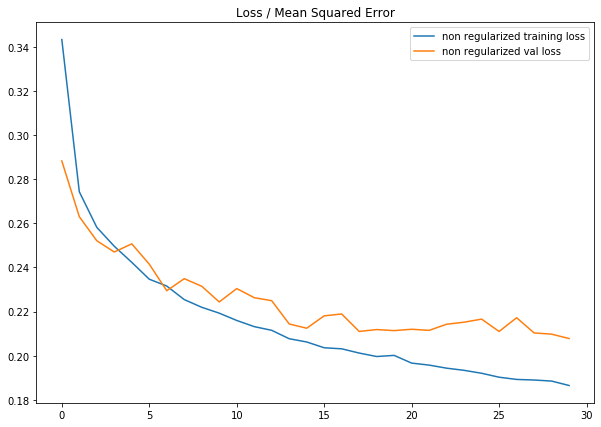

In [26]:
plt.figure(figsize=(10,7))
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='non regularized training loss')
pyplot.plot(history.history['val_loss'], label='non regularized val loss')
pyplot.legend()
pyplot.show()

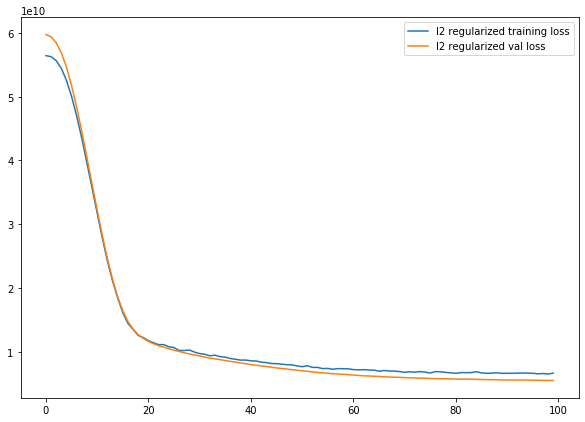

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(l2model.history.history['loss'],label = 'l2 regularized training loss')
plt.plot(l2model.history.history['val_loss'],label = 'l2 regularized val loss')
plt.legend()